Importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Cargamos los datos para el entrenamiento del modelo

In [2]:
df = pd.read_excel('Datathon-main/E-Commerce_train.xlsx')
df 

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


Comenzamos con el EDA

In [3]:
# Observamos las dimensiones del dataset
df.shape

(8999, 12)

In [4]:
# Observamos el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [5]:
# Revisamos si hay Nulos
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Observamos las estadísticas del dataset

In [6]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Aqui vemos el porcentaje de entregas puntuales 63.55%

analizamos la variable objetivo

In [7]:
a = df['Reached.on.Time_Y.N'].unique()
a

array([1, 0])

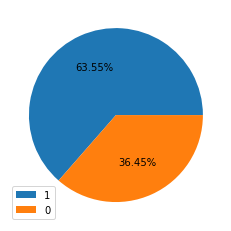

In [8]:
fig, ax = plt.subplots()

ax.pie(df['Reached.on.Time_Y.N'].value_counts(),autopct='%1.2f%%')
plt.legend(a)
plt.show()

#plt.pie(df['Reached.on.Time_Y.N'])

verificamos de nuevo: el 63.55% de los paquetes se entregó a tiempo

Ahora procedemos a reducir la dimensionalidad del dataset. Para ello tenemos dos opciones:

1. Evaluamos la correlacion entre todas las variables lo que implica reemplazar las variables categoricas por binarias o dummies.

2. se hace analisis de correlación de las variables numericas y test chi cuadrado con las categoricas.

Vamos a hacer ambas para practicar y comparar los resultados.

vamos a hacer primero la opcion 2  que es mas directa

Primero vamos a eliminar el campo ID porque sabemos por simple intuicion que no influye sobre la variable objetivo... ojo esta teoria esta en revision

In [53]:
#df.drop(['ID'], axis=1, inplace=True)

Vamos a observar la correlacion entre las variables

<AxesSubplot:>

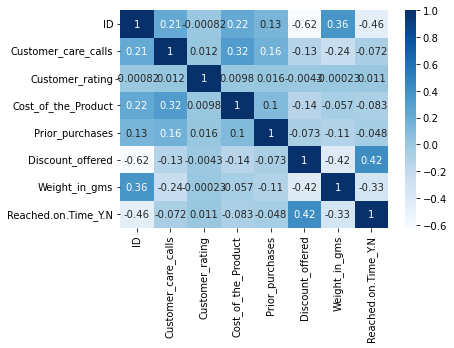

In [9]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

Algunos autores consideran que una correlacion de 0.3 ya es alta. Aqui vemos que Discount_offered tiene alta correlacion con otras dos variables.. y lo mismo Customer_care_calls y weight_in_gms.. procedemos a eliminarlas
Aunque dejemos el ID en el paso anterior aqui sale por correlacion con la variable objetivo

In [10]:
df.drop(['Discount_offered'], axis=1, inplace=True)
df.drop(['Customer_care_calls'], axis=1, inplace=True)
df.drop(['Weight_in_gms'], axis=1, inplace=True)
df.drop(['ID'], axis=1, inplace=True)




Volvemos a imprimir la matriz de confusion

<AxesSubplot:>

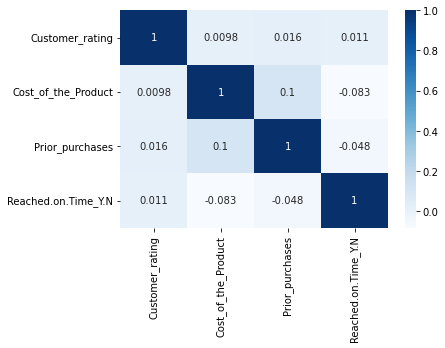

In [11]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

Ahora procedemos con el test chi cuadrado sobre las variables categoricas

Warehouse_block

In [12]:
crossTab = pd.crosstab(df['Warehouse_block'], df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.9071521437355561


Mode_of_shipment

In [13]:
crossTab = pd.crosstab(df['Mode_of_Shipment'], df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.2568899601964812


Product_importance

In [14]:
crossTab = pd.crosstab(df['Product_importance'], df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.175738927009453


Gender

In [15]:
crossTab = pd.crosstab(df['Gender'], df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.8015181812471062


Segun el test chi cuadrado, valores de p mayores a 0.05 indican que las variables no estan relacionadas con la varible objetivo por lo que procedemos a eliminarlas. 

In [20]:
# vamos a dejar product importance por su valor de p un poco bajo, solo para probar
df.drop(['Warehouse_block', 'Mode_of_Shipment', 'Gender'], axis=1, inplace=True)
df.drop(['Product_importance'], axis = 1, inplace = True)

Definimos la variable objetivo y las variables independientes

In [21]:
X = df.drop(['Reached.on.Time_Y.N'], axis = 1)
y = df['Reached.on.Time_Y.N']

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer_rating      8999 non-null   int64
 1   Cost_of_the_Product  8999 non-null   int64
 2   Prior_purchases      8999 non-null   int64
dtypes: int64(3)
memory usage: 211.0 KB


Ahora vamos a separar los datos de entrenamiento y prueba

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [24]:
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

debido a lo simple del modelo hagamos regresion logística

In [25]:
from sklearn.linear_model import LogisticRegression

# Instanciamos el modelo y lo entrenamos

clf = LogisticRegression()

# Lo entrenamos

clf.fit(X,y)

LogisticRegression()

In [26]:
from sklearn.metrics import accuracy_score 


# Predecimos

y_pred = clf.predict(X)

# Evaluamos

print('El score del modelo es:', accuracy_score(y, y_pred))

El score del modelo es: 0.6352928103122569


In [27]:
from sklearn.metrics import recall_score


In [28]:
print('El score del modelo es:', recall_score(y, y_pred))

El score del modelo es: 0.9986011540479105


probamos sobre el dataset de prueba

In [29]:
df2 = pd.read_excel('Datathon-main/E-Commerce_test.xlsx')
df2

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


seleccionamos las variables independientes

In [30]:
X2 = df2.drop(['ID', 'Warehouse_block','Mode_of_Shipment', 'Customer_care_calls',  'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms' ], axis = 1)


Hacemos la prediccion

In [31]:
y2_pred = clf.predict(X2)



In [35]:
type(y2)

pandas.core.series.Series

Pasamos y2 a dataframe y cambiamos el nombre de la columna

In [45]:
roreravi=pd.DataFrame(y2)
roreravi.columns=['pred']
roreravi

,pred
0,0
1,0
2,0
3,0
4,1
...,...
1995,1
1996,0
1997,0
1998,0


y finalmente exportamos el csv

In [47]:

roreravi.to_csv("roreravi.csv", index = False)
